In [1]:
# importing necessary libraires:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1 Loading the dataset

In [2]:
# 1. Loading the dataset:
df=pd.read_csv(r"C:\Users\Sanjay Sah\Desktop\BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
## Dataset Information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


It can be seen from the dataset information,there are 506 entries but the column 'rm' contains 5 missing values, which require imputation. Regarding the type of data type, all the coulmns are of numerical type.

In [4]:
## Data Visualization:
def scatterplot(df,column_name=''):
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=df[column_name],y=df['medv'])
    plt.title(f"{column_name} vs medv")
    plt.show()

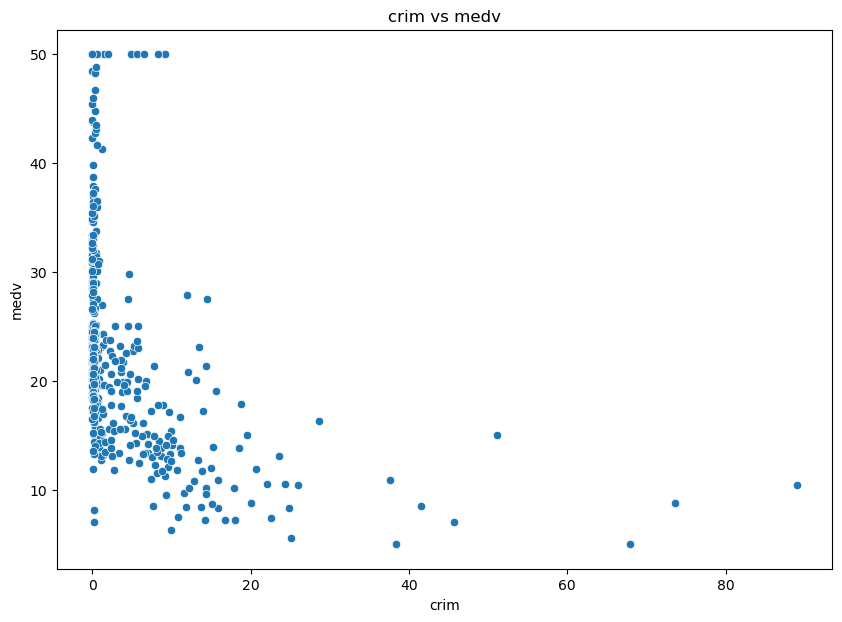

In [5]:
scatterplot(df,'crim')

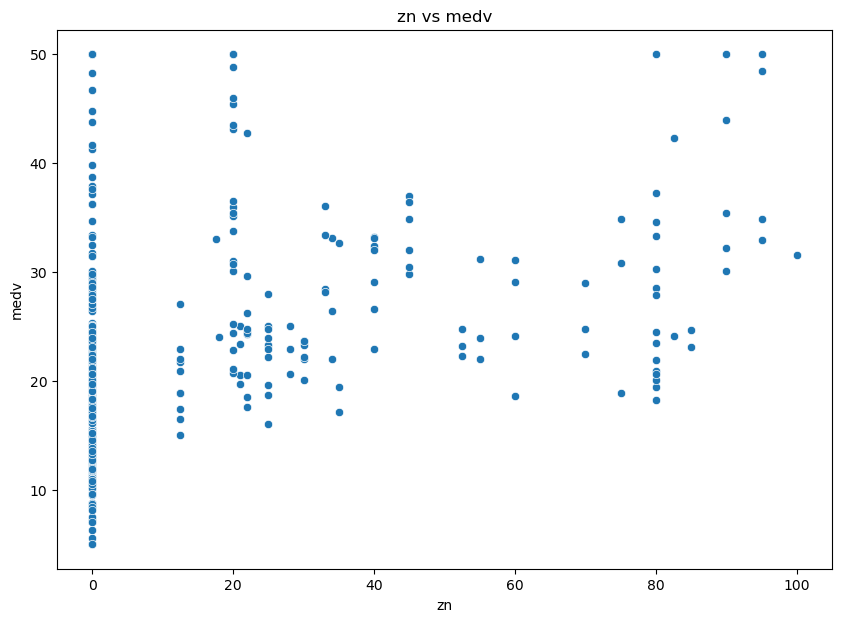

In [6]:
scatterplot(df,'zn')

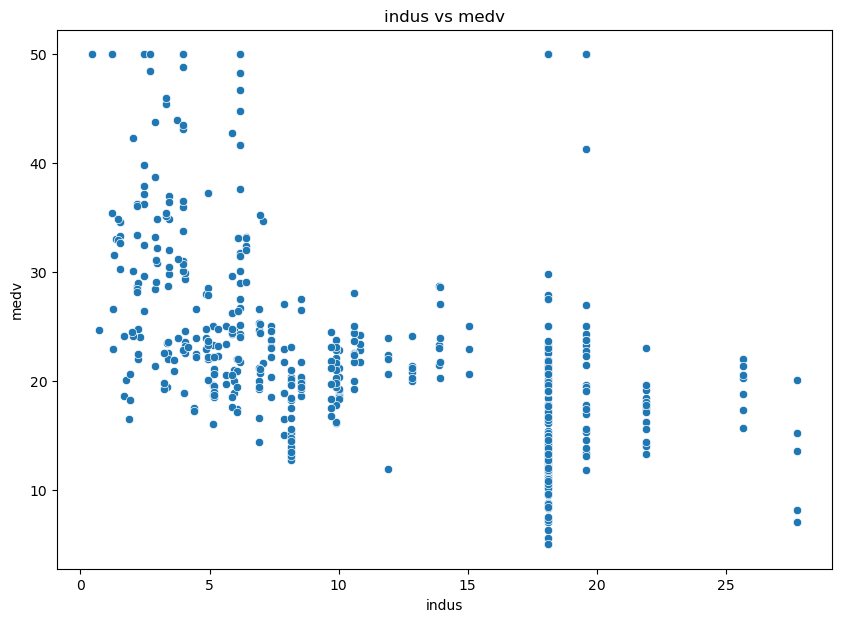

In [7]:
scatterplot(df,'indus')

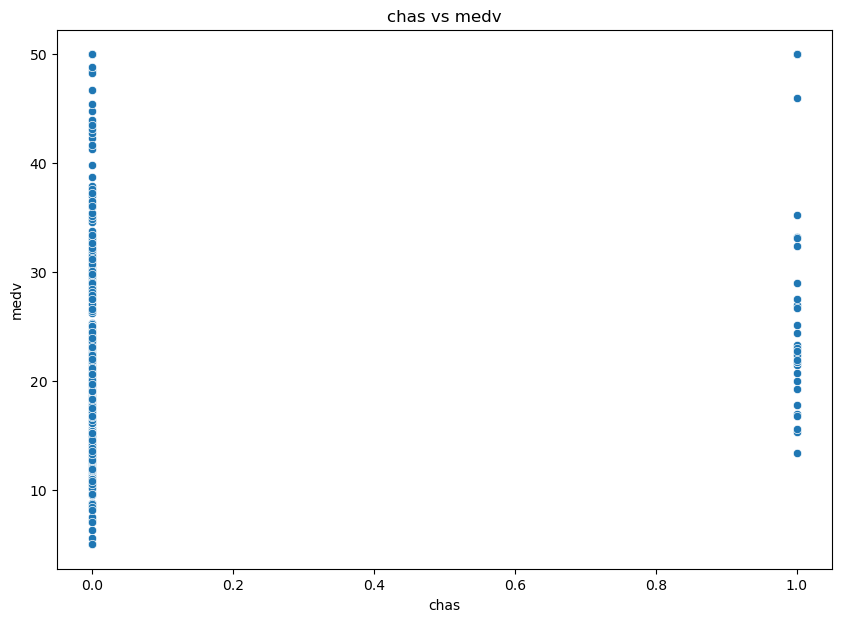

In [8]:
scatterplot(df,'chas')

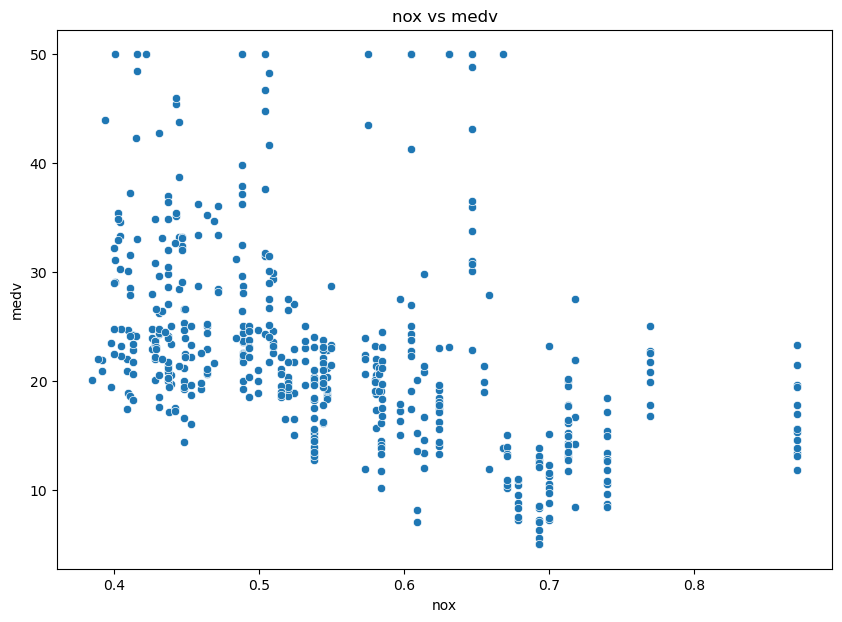

In [9]:
scatterplot(df,'nox')

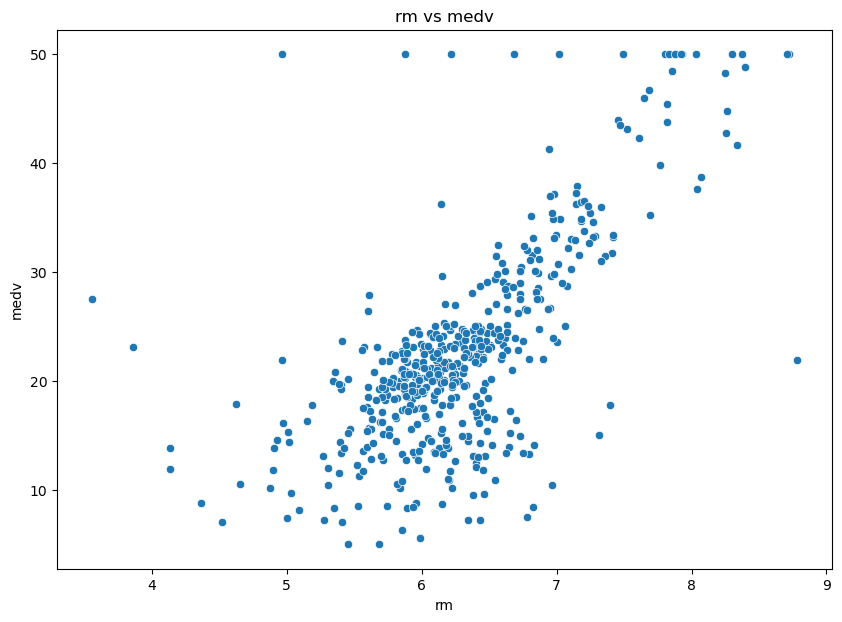

In [10]:
scatterplot(df,'rm')

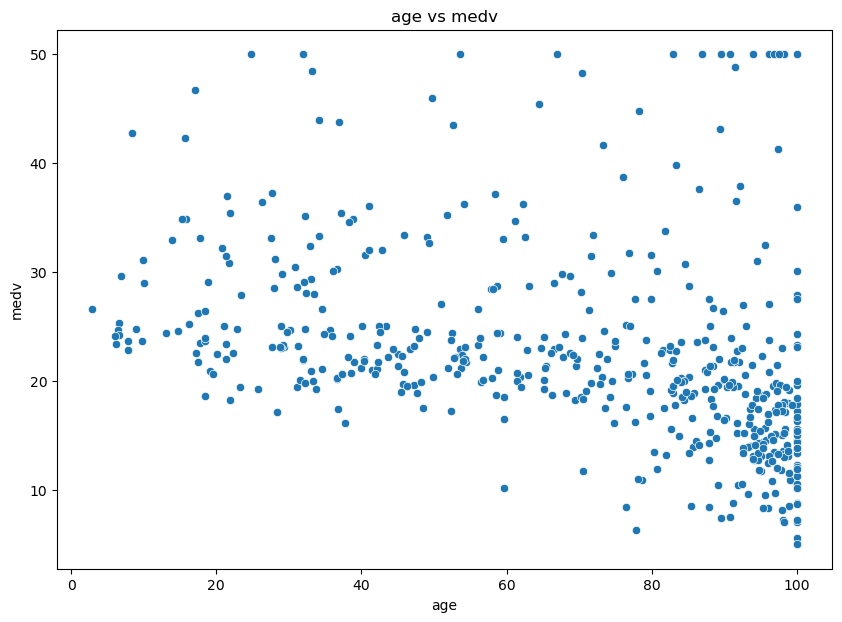

In [11]:
scatterplot(df,'age')

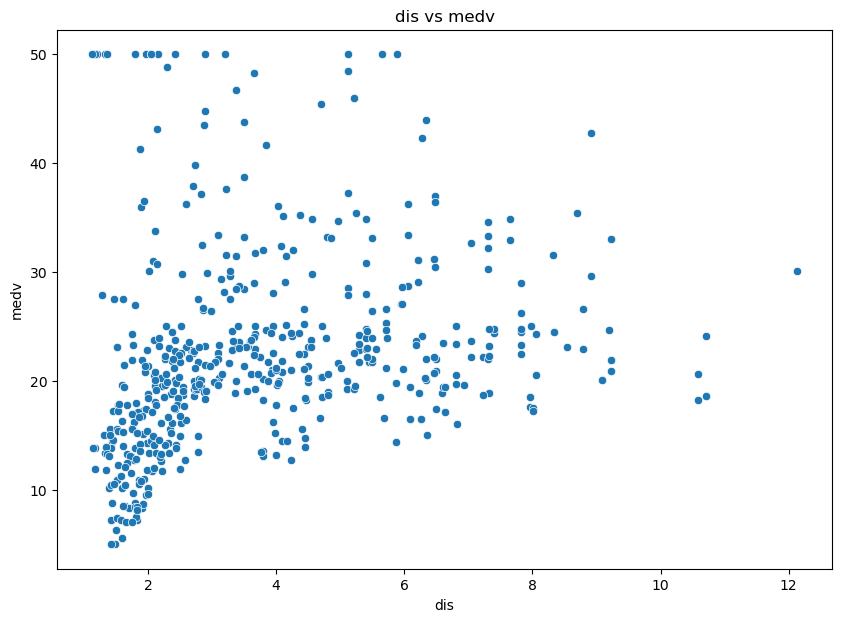

In [12]:
scatterplot(df,'dis')

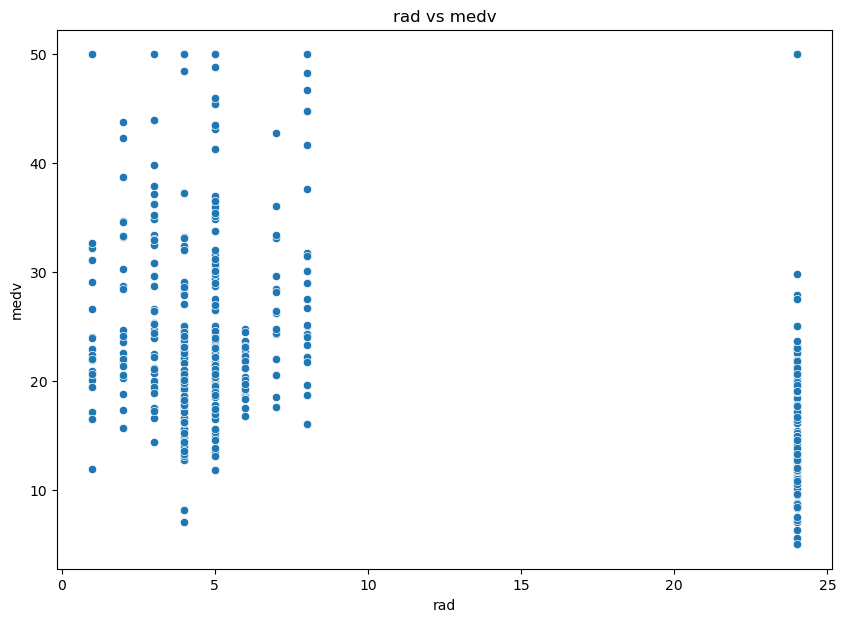

In [13]:
scatterplot(df,'rad')

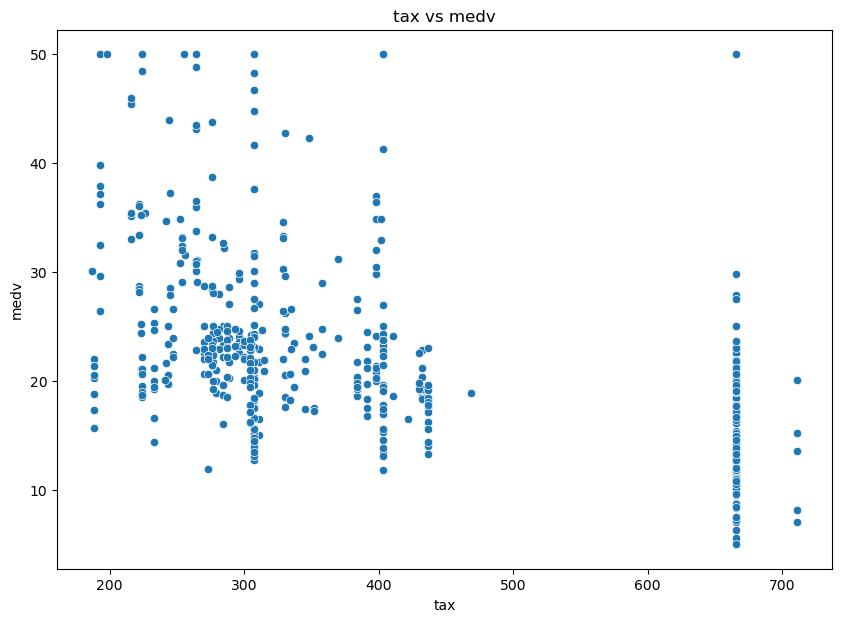

In [14]:
scatterplot(df,'tax')

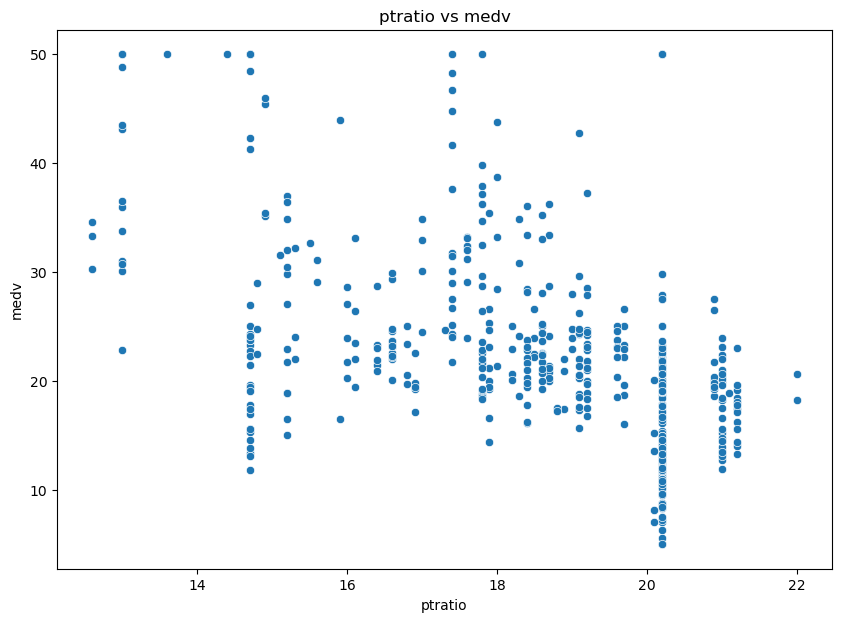

In [15]:
scatterplot(df,'ptratio')

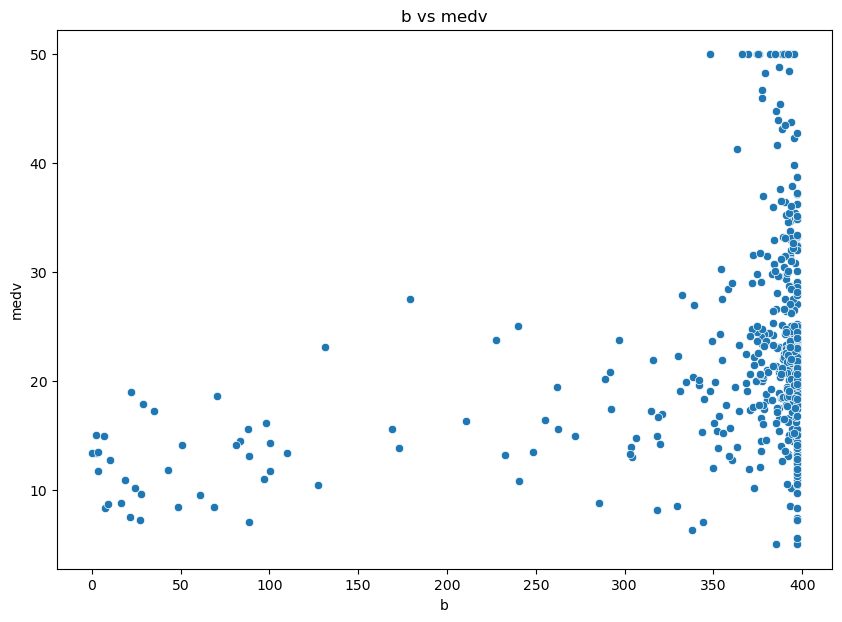

In [16]:
scatterplot(df,'b')

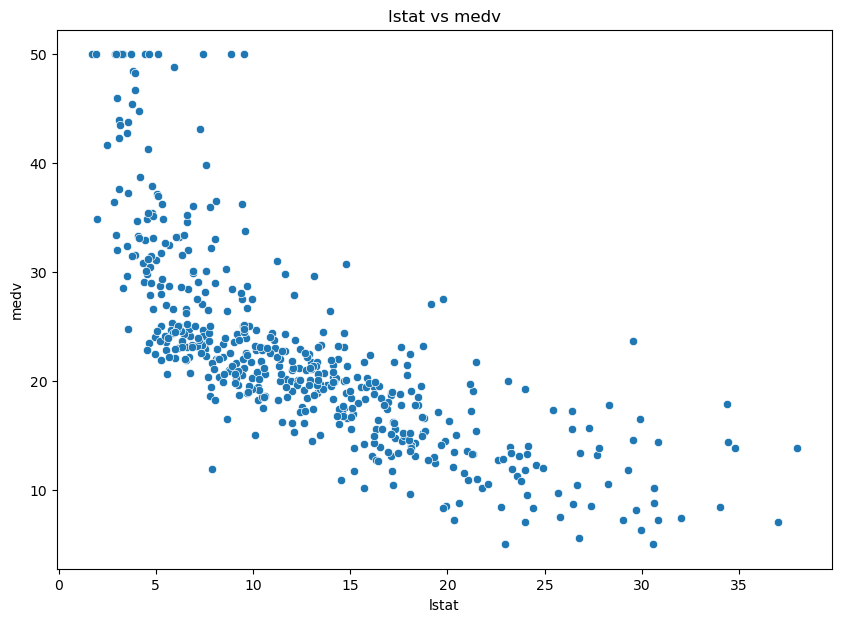

In [17]:

scatterplot(df,'lstat')


<Axes: title={'center': 'Heat MAP'}>

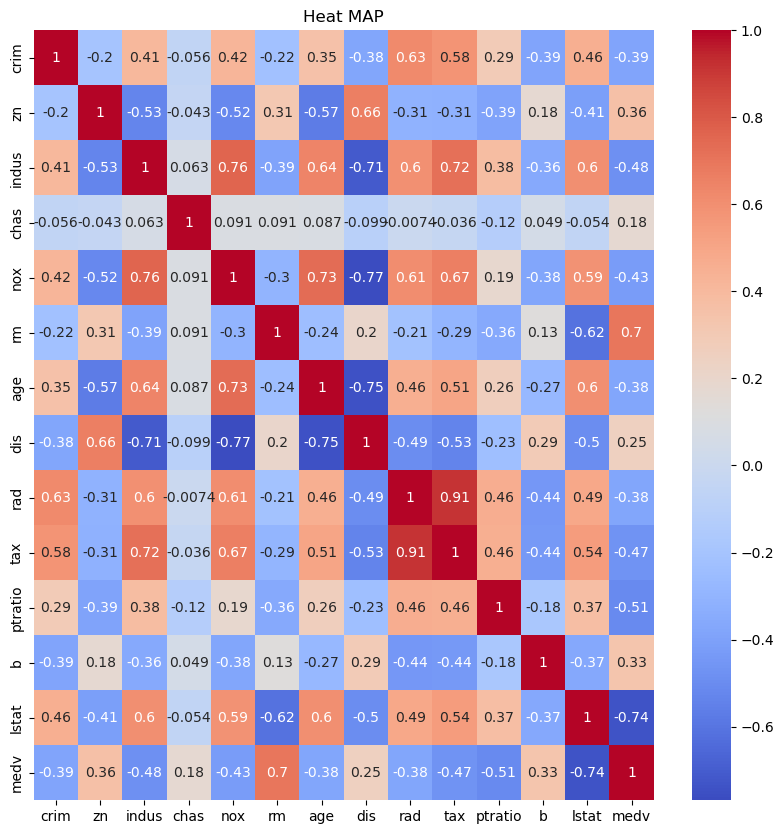

In [18]:
### EDA:
plt.figure(figsize=(10,10))
plt.title("Heat MAP")
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

It can be seen from the heat map that our target "medv" show positive correlation with 'b', 'dis', rm, chas, zn and shows negative correaltion with the remaining features.
Further more, the targert shows string positive correlation with feature,rm.

# 2. Preparing the data for Training:


In [19]:
## Splitting the dataset into training and testing dataset:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)

In [20]:
train_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


In [21]:
test_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86,22.5


It is evident that feature 'rm' has null 4 entries.

It is evident that feature 'rm' has null 1 entries.

In [22]:
# identifying input and target columns:
input_cols=list(df.columns[0:-1])
target_cols='medv'
input_cols, target_cols

(['crim',
  'zn',
  'indus',
  'chas',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'b',
  'lstat'],
 'medv')

In [23]:
X_train=train_df[input_cols].copy()
y_train=train_df[target_cols].copy()

In [24]:
X_test=test_df[input_cols].copy()
y_test=test_df[target_cols].copy()

In [25]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       400 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    int64  
 9   tax      404 non-null    int64  
 10  ptratio  404 non-null    float64
 11  b        404 non-null    float64
 12  lstat    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [27]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 173 to 75
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     102 non-null    float64
 1   zn       102 non-null    float64
 2   indus    102 non-null    float64
 3   chas     102 non-null    int64  
 4   nox      102 non-null    float64
 5   rm       101 non-null    float64
 6   age      102 non-null    float64
 7   dis      102 non-null    float64
 8   rad      102 non-null    int64  
 9   tax      102 non-null    int64  
 10  ptratio  102 non-null    float64
 11  b        102 non-null    float64
 12  lstat    102 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 11.2 KB


In [29]:
## Imputing the missing values:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(df[input_cols])

SimpleImputer()

In [30]:
X_train[input_cols]=imputer.transform(X_train[input_cols])
X_test[input_cols]=imputer.transform(X_test[input_cols])

In [31]:
## Checking
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  b        404 non-null    float64
 12  lstat    404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB


In [32]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86


In [33]:
## Checking the statistics of the X_train:
X_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.316706,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709154,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.217500,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [34]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


# Feature Engineering: Scaling numeric values to range of 0,1

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[input_cols])

MinMaxScaler()

In [37]:
X_train[input_cols]=scaler.transform(X_train[input_cols])
X_test[input_cols]=scaler.transform(X_test[input_cols])

In [38]:
## Checking
X_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040495,0.115693,0.385816,0.071782,0.352848,0.528014,0.676173,0.243577,0.363323,0.414184,0.608332,0.897570,0.296009
std,0.099754,0.231525,0.252735,0.258447,0.242190,0.135879,0.288310,0.193802,0.373466,0.317123,0.237096,0.230890,0.196203
min,0.000031,0.000000,0.010264,0.000000,0.000000,0.057865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000844,0.000000,0.171188,0.000000,0.137860,0.446350,0.439238,0.087140,0.130435,0.175573,0.446809,0.945969,0.139142
50%,0.002867,0.000000,0.296921,0.000000,0.314815,0.509006,0.770340,0.186066,0.173913,0.272901,0.648936,0.985892,0.253725
75%,0.035929,0.200000,0.646628,0.000000,0.506173,0.589337,0.934604,0.388400,0.478261,0.914122,0.808511,0.997113,0.404042
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
X_test.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.040740,0.105490,0.413407,0.058824,0.334586,0.497251,0.677117,0.237644,0.404945,0.453993,0.680747,0.902520,0.322799
std,0.083844,0.240832,0.246429,0.236456,0.223462,0.126695,0.297537,0.182847,0.398343,0.338669,0.191551,0.228559,0.199906
min,0.000000,0.000000,0.000000,0.000000,0.014403,0.000000,0.033986,0.003592,0.000000,0.001908,0.042553,0.016037,0.031733
25%,0.000911,0.000000,0.206837,0.000000,0.130144,0.442470,0.421215,0.103152,0.130435,0.180821,0.617021,0.944828,0.164390
50%,0.002288,0.000000,0.371334,0.000000,0.302469,0.500000,0.739444,0.202221,0.173913,0.301527,0.702128,0.988161,0.292632
75%,0.050760,0.000000,0.646628,0.000000,0.486626,0.557099,0.950824,0.330568,1.000000,0.914122,0.808511,1.000000,0.449434
max,0.514104,0.950000,1.000000,1.000000,1.000000,0.857061,1.000000,0.871218,1.000000,1.000000,1.000000,1.000000,0.972682


## Training the Model

In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
# Getting the weights and intercepts:
model.intercept_,model.coef_

(23.650150639475907,
 array([-10.05809155,   3.0209159 ,   1.13829585,   2.78758593,
         -8.35381952,  23.11596028,  -0.59319612, -15.85908411,
          6.04331768,  -5.5788005 ,  -8.62996451,   4.8974317 ,
        -18.44519914]))

In [42]:
weight_df=pd.DataFrame({"Feature":input_cols,
                        "Weight":model.coef_
    
})
weight_df

,Feature,Weight
0,crim,-10.058092
1,zn,3.020916
2,indus,1.138296
3,chas,2.787586
4,nox,-8.353820
5,rm,23.115960
6,age,-0.593196
7,dis,-15.859084
8,rad,6.043318
9,tax,-5.578800


## PRediction from the model:


In [43]:
y_pred=model.predict(X_test)
y_pred

array([28.98141872, 36.01423173, 14.82430919, 25.0229357 , 18.77077366,
       23.25088901, 17.65921355, 14.3312157 , 23.01799598, 20.61923725,
       24.91477542, 18.65745019, -6.08024872, 21.75669434, 19.23608436,
       26.18483638, 20.65521785,  5.80089206, 40.48814091, 17.61519761,
       27.23332555, 30.05317191, 11.3328674 , 24.1383693 , 17.86296594,
       15.84437533, 22.77843276, 14.57521147, 22.4366747 , 19.18599316,
       22.42492941, 25.20638527, 25.92633141, 17.7144719 , 16.77105313,
       16.96804968, 31.22105015, 20.12198187, 23.76217047, 24.62043216,
       13.93268126, 32.23349827, 42.65936186, 17.32784863, 27.25487922,
       16.99795581, 14.06061007, 25.89028965, 20.29789589, 29.94485087,
       21.30603148, 34.33630976, 16.03389489, 26.20109252, 39.52390271,
       22.58297123, 18.84703823, 32.71222177, 25.05158461, 12.90043059,
       20.56663412, 30.48440628, 31.50592444, 15.8863132 , 20.23931509,
       16.71637229, 20.52048882, 25.95211452, 30.60472918, 11.60

## Evaluating the model:

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Square Error',mse)
print('R_suare Score',r2)

Mean Square Error 24.40482518814646
R_suare Score 0.6672089705941882
